# **Chương 4: Advanced Operations, Detecting Faces and Features**


khai báo 1 số cái thông dụng như các chương trước

In [ ]:
# Import the modules from skimage
from skimage import data, color
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
from skimage.filters import try_all_threshold
from skimage.filters import sobel
from skimage.filters import gaussian
from skimage import exposure
from skimage.transform import rotate, rescale
from skimage.transform import resize
from skimage import morphology
import matplotlib.patches as patches # create a red rectangle
from skimage.feature import Cascade # face detection

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()
# định nghĩa cái mask(mask = get_mask) là 1 tham số trong module nào đó
def get_mask(image):
  ''' Creates mask with three defect regions '''
  mask = np.zeros(image.shape[:-1])
  mask[101:106, 0:240] = 1
  mask[152:154, 0:60] = 1
  mask[153:155, 60:100] = 1
  mask[154:156, 100:120] = 1
  mask[155:156, 120:140] = 1
  mask[212:217, 0:150] = 1
  mask[217:222, 150:256] = 1
  return mask

# Function to show image with contours(đường nét)
def show_image_contour(image, contours):
    plt.figure()
    plt.title("Sau khi tìm hàm bao")
    plt.imshow(image, cmap='gray')
    for contour in contours:
        plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
    plt.show()

# show corner
def show_image_with_corners(image, coords, title="Corners detected"):
  plt.imshow(image, interpolation='nearest'
  , cmap='gray')
  plt.title(title)
  plt.plot(coords[:, 1], coords[:, 0],
  '+r'
  , markersize=15)
  plt.axis('off')
  plt.show()

 # create a red rectangle
def show_detected_face(result, detected, title="Face image"):
    plt.imshow(result, cmap='gray')
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')
    for patch in detected:
        img_desc.add_patch(patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False, color='r', linewidth=2))
    plt.show()



# Edge

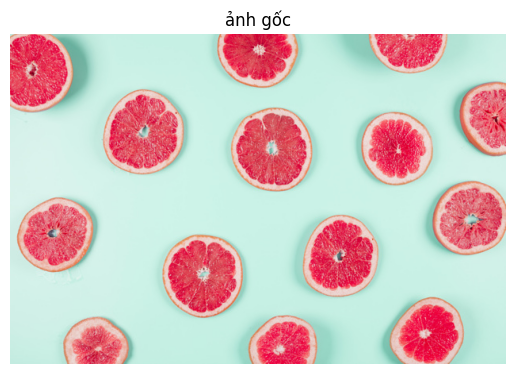

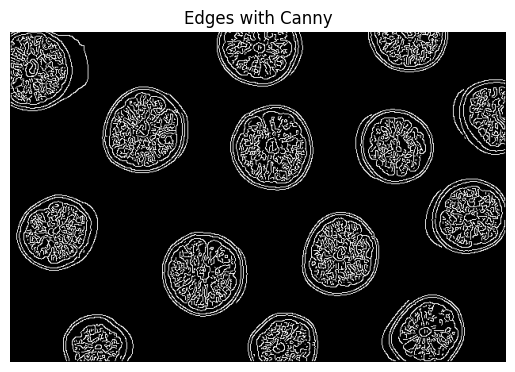

In [ ]:
# Import the canny edge detector
from skimage.feature import canny

grapefruit_main = plt.imread("toronjas.jpg")

# Convert image to grayscale
grapefruit = color.rgb2gray(grapefruit_main)

# Apply canny edge detector
canny_edges = canny(grapefruit)

show_image(grapefruit_main, "ảnh gốc")
# Show resulting image
show_image(canny_edges, "Edges with Canny")

# So sánh khi tăng sigma lên

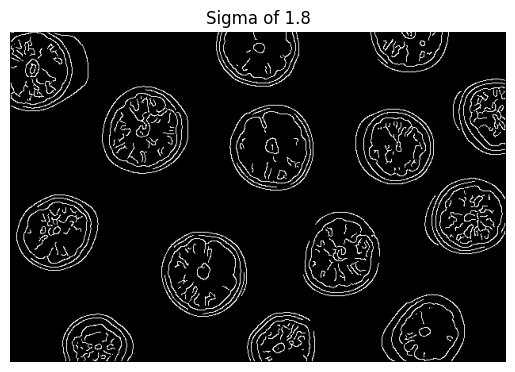

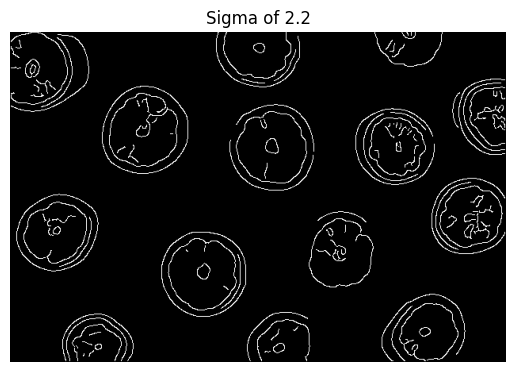

In [ ]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruit, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruit, sigma=2.2)

# Show resulting images
show_image(edges_1_8, "Sigma of 1.8")
show_image(edges_2_2, "Sigma of 2.2")

# Perspective
In this exercise, you will detect the corners of a building using the Harris corner detector. The threshold_rel parameter will specify the minimum intensity of peaks.
→ Xác định corner dựa trên thuật toán **Harris Corner Detector**

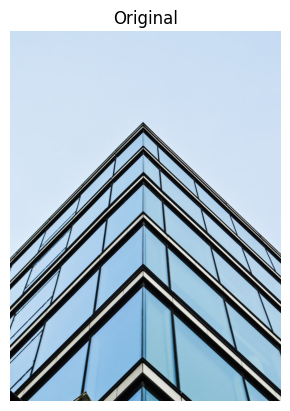

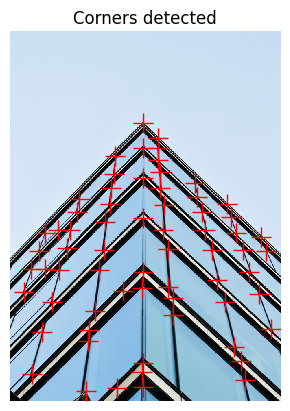

In [ ]:
# Import the corner detector related functions and module
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray

building_image = plt.imread("corners_building_top.jpg")

# Convert image from RGB-3 to grayscale
building_image_gray = rgb2gray(building_image)

# Apply the detector  to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=20, threshold_rel=0.02)

# Show original and resulting image with corners detected
show_image(building_image, "Original")
show_image_with_corners(building_image, coords)

So sánh 2 hình ảnh khi tăng tham số min_distance từ 10 lên 60

With a min_distance set to 10, we detect a total 89 corners in the image.
With a min_distance set to 60, we detect a total 20 corners in the image.


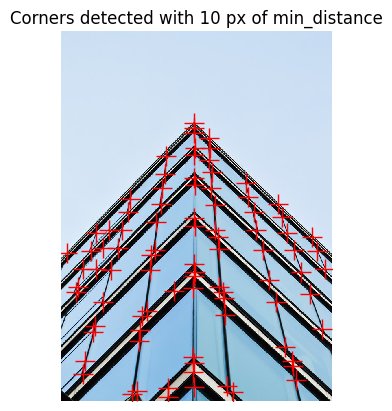

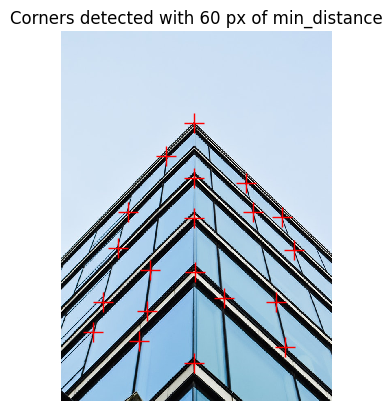

In [ ]:
# Find the peaks with a min distance of 10 pixels
coords_w_min_10 = corner_peaks(measure_image, min_distance=10, threshold_rel=0.02)
print("With a min_distance set to 10, we detect a total", len(coords_w_min_10), "corners in the image.")

# Find the peaks with a min distance of 60 pixels
coords_w_min_60 = corner_peaks(measure_image, min_distance=60, threshold_rel=0.02)
print("With a min_distance set to 60, we detect a total", len(coords_w_min_60), "corners in the image.")

# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_10, "Corners detected with 10 px of min_distance")
show_image_with_corners(building_image, coords_w_min_60, "Corners detected with 60 px of min_distance")

# **Face detection**

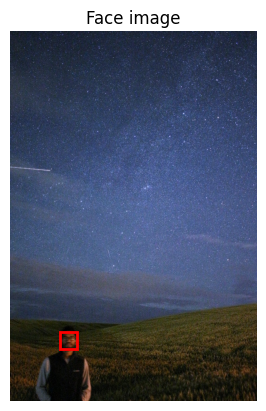

In [ ]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

night_image = plt.imread("face_det3.jpg")

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img = night_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10,10),
                                       max_size=(200,200))

# Show the detected faces
show_detected_face(night_image, detected)

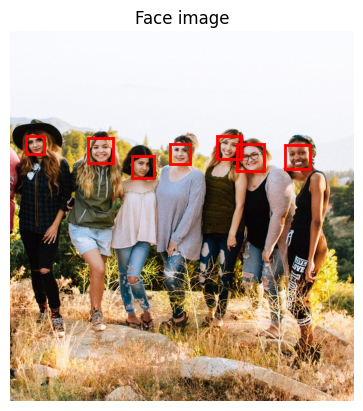

In [ ]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

friends_image = plt.imread("face_det_friends22.jpg")

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))
# Show the detected faces
show_detected_face(friends_image, detected)

# Cái trả ra:
{'r': 218, 'c': 440, 'width': 52, 'height': 52}

{'r': 207, 'c': 152, 'width': 47, 'height': 47}

{'r': 202, 'c': 402, 'width': 45, 'height': 45}

{'r': 219, 'c': 533, 'width': 48, 'height': 48}

{'r': 217, 'c': 311, 'width': 39, 'height': 39}

{'r': 202, 'c': 31, 'width': 36, 'height': 36}

{'r': 242, 'c': 237, 'width': 41, 'height': 41}

# sử dụng kết hợp với function slic()
Trước đây, bạn đã học cách làm cho các quy trình trở nên hiệu quả hơn về mặt tính toán bằng phân đoạn siêu pixel không giám sát. Trong bài tập này, bạn sẽ làm được điều đó! Sử dụng hàm slic() để phân đoạn, xử lý trước hình ảnh trước khi chuyển nó đến bộ dò tìm khuôn mặt.

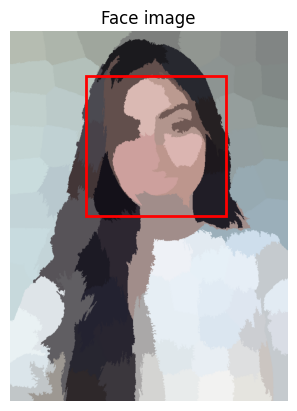

In [ ]:
from skimage.segmentation import slic
from skimage.color import label2rgb

profile_image = plt.imread("face_det9.jpg")

# Obtain the segmentation using SLIC
segments = slic(profile_image, n_segments=100, compactness=10)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, profile_image, kind='avg')

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)
